In [1]:
# Importing Qiskit and IonQ accounts
from qiskit import IBMQ

# Loading your IBM Quantum and IonQ accounts
# IBMQ.save_account('token')
IBMQ.load_account()
ibmq_provider = IBMQ.get_provider('ibm-q-skku','yonsei-uni','yu-students')

In [2]:
import numpy as np
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
n = 4
s = 2

In [4]:
oracle_g = QuantumCircuit(int(n/2))
oracle_g.z(0)

shift_s = QuantumCircuit(n)
if s%2 == 1:
    shift_s.x(0)
if s%4 - s%2 == 2:
    shift_s.x(1)
if s%8 - s%4 == 4:
    shift_s.x(2)
if s%16 - s%8 == 8:
    shift_s.x(3)

oracle_f = QuantumCircuit(n)
oracle_f.compose(shift_s, inplace=True)
oracle_f.barrier()
oracle_f.compose(oracle_g, qubits=[0,1], inplace=True)
oracle_f.barrier()
oracle_f.cz(0,2)
oracle_f.cz(1,3)
oracle_f.barrier()
oracle_f.compose(shift_s, inplace=True)

oracle_sf = QuantumCircuit(n)
oracle_sf.compose(oracle_g, qubits=[2,3], inplace=True)
oracle_sf.barrier()
oracle_sf.cz(0,2)
oracle_sf.cz(1,3)

In [5]:
circ = QuantumCircuit(n, n)

for i in range(n):
    circ.h(i)
circ.barrier()
circ.compose(oracle_f, inplace=True)
circ.barrier()
for i in range(n):
    circ.h(i)
circ.barrier()
circ.compose(oracle_sf, inplace=True)
circ.barrier()
for i in range(n):
    circ.h(i)
circ.barrier()
for i in range(n):
    circ.measure(i, i)

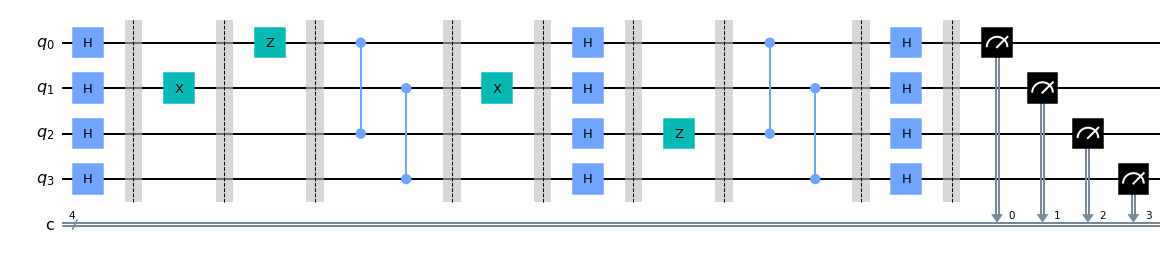

In [6]:
circ.draw('mpl')

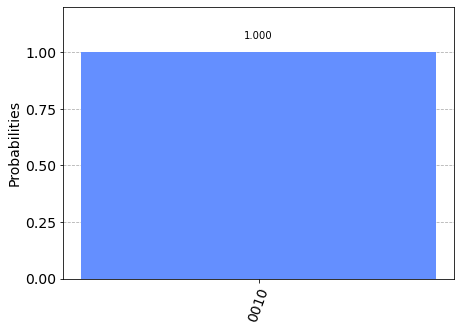

In [7]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
transpiled_circ = transpile(circ, aer_sim)
qobj = assemble(transpiled_circ, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)